In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('Dataset.csv')

/tmp/ipykernel_46951/2574449746.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')


In [2]:
df.shape

(200031, 22)

In [3]:
# dropping all non-covid patients
df = df.drop(df[df['CLASIFFICATION_FINAL'] > 3].index)
df.shape

(111292, 22)

In [4]:
# dropping irrelevant columns
df.drop(columns=['index','DATE_DIED','PATIENT_TYPE','PREGNANT', 'MEDICAL_UNIT'], inplace=True)
df.shape

(111292, 17)

In [5]:
# replacing null values to be recognised
df.replace('?',np.nan, inplace=True)
df.isnull().sum()

USMER                      0
SEX                        0
INTUBED                 1513
PNEUMONIA                  0
AGE                        0
DIABETES                 636
COPD                     573
ASTHMA                   569
INMSUPR                  634
HIPERTENSION             612
OTHER_DISEASE           1028
CARDIOVASCULAR           633
OBESITY                  619
RENAL_CHRONIC            594
TOBACCO                  625
CLASIFFICATION_FINAL       0
ICU                     1521
dtype: int64

In [6]:
# dropping any rows with null values 
df.dropna(how='any', inplace=True)
df.isnull().sum()

USMER                   0
SEX                     0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df.shape

(108273, 17)

Text(0, 0.5, 'Age')

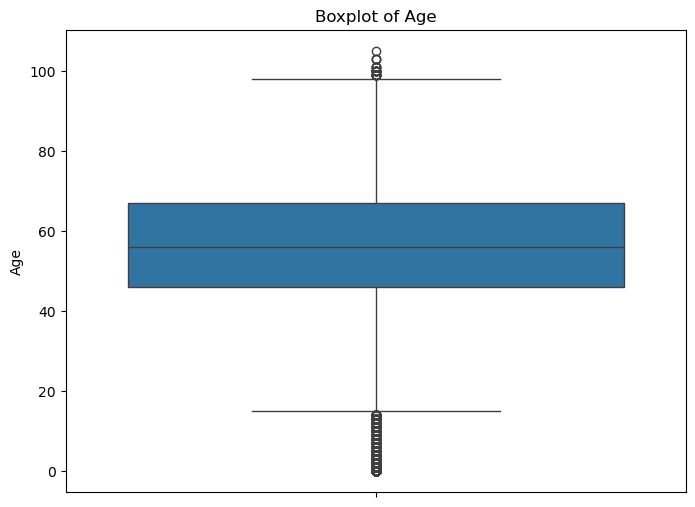

In [8]:
# plotting IQR of AGE
plt.figure(figsize=(8,6))
sns.boxplot(y = df['AGE'])
plt.title("Boxplot of Age")
plt.ylabel("Age")

In [9]:
# removing outliers from AGE using IQR method
Q1 = df['AGE'].quantile(0.25)
Q3= df['AGE'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned_iqr = df[~((df['AGE'] < (Q1 - 1.5 * IQR)) | (df['AGE'] > (Q3 + 1.5 * IQR)))]
df = df_cleaned_iqr
df.shape

(106985, 17)

In [10]:
df.dtypes

USMER                    int64
SEX                      int64
INTUBED                 object
PNEUMONIA               object
AGE                      int64
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HIPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
ICU                     object
dtype: object

In [11]:
# encoding categorical columns
cat_var = ['SEX','USMER','CLASIFFICATION_FINAL']
df = pd.get_dummies(df, columns=cat_var)
df.dtypes

INTUBED                   object
PNEUMONIA                 object
AGE                        int64
DIABETES                  object
COPD                      object
ASTHMA                    object
INMSUPR                   object
HIPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
RENAL_CHRONIC             object
TOBACCO                   object
ICU                       object
SEX_1                       bool
SEX_2                       bool
USMER_1                     bool
USMER_2                     bool
CLASIFFICATION_FINAL_1      bool
CLASIFFICATION_FINAL_2      bool
CLASIFFICATION_FINAL_3      bool
dtype: object

In [12]:
# changing categorical columns to int and renaming SEX columns to F and M
cat_cols = ['SEX_1', 'SEX_2', 'USMER_1', 'USMER_2','CLASIFFICATION_FINAL_1', 'CLASIFFICATION_FINAL_2', \
            'CLASIFFICATION_FINAL_3']
df[cat_cols] = df[cat_cols].replace({True:1,False:0})
df = df.rename(columns={'SEX_1':'SEX_F', 'SEX_2':'SEX_M'})

/tmp/ipykernel_46951/187397860.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].replace({True:1,False:0})


In [13]:
# normalising data types of columns to int
df['ICU'] = df['ICU'].replace({'1.0':'1', '2.0':'2'})
binary_cols = ['INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
               'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']
df[binary_cols] = df[binary_cols].replace({'1': 1, '2': 0})
df['PNEUMONIA'] = df['PNEUMONIA'].replace(2, 0)

/tmp/ipykernel_46951/210833647.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'1': 1, '2': 0})


In [14]:
df.dtypes

INTUBED                   int64
PNEUMONIA                 int64
AGE                       int64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
ICU                       int64
SEX_F                     int64
SEX_M                     int64
USMER_1                   int64
USMER_2                   int64
CLASIFFICATION_FINAL_1    int64
CLASIFFICATION_FINAL_2    int64
CLASIFFICATION_FINAL_3    int64
dtype: object

In [15]:
df.shape

(106985, 21)

In [16]:
# moving ICU to end of dataframe
df.insert(20, 'ICU', df.pop('ICU'))
df.head()

,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,...,RENAL_CHRONIC,TOBACCO,SEX_F,SEX_M,USMER_1,USMER_2,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,ICU
0,1,0,55,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,1,40,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,37,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,25,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,24,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [17]:
df_clean = df

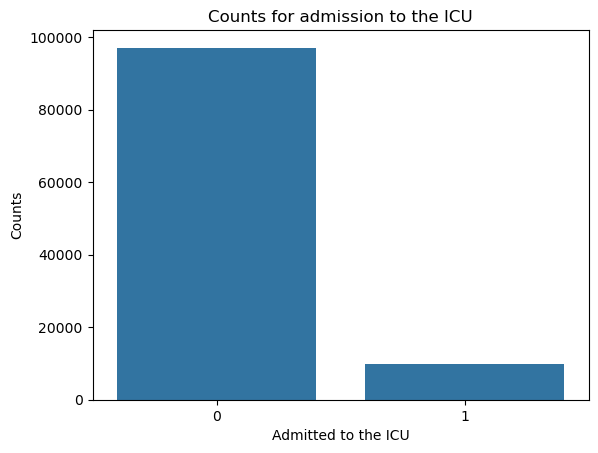

ICU
0    97074
1     9911
Name: count, dtype: int64


In [20]:
# count plot for ICU admissions
plot_ICU= sns.countplot(data=df_clean, x='ICU')
plot_ICU.set(xlabel='Admitted to the ICU', ylabel='Counts', title='Counts for admission to the ICU')
plt.savefig('ICU_Counts.png')
plt.show()
print(df['ICU'].value_counts())

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
# training logistical model with ICU as target and all other columns as features
feature_cols = df.columns.tolist() 
feature_cols.remove('ICU')

X = df[feature_cols]
Y = df['ICU']

model = LogisticRegression(max_iter=1000)
model.fit(X, Y)

# printing feature importance
print("\nCoefficients:")
for feat, coef in zip(feature_cols, model.coef_[0]): 
    print(f"{feat:>20}: {coef}")


Coefficients:
             INTUBED: 1.8410476135681184
           PNEUMONIA: 1.1849791322026897
                 AGE: -0.0070895431610106
            DIABETES: 0.04615589420252978
                COPD: -0.03993492747928539
              ASTHMA: 0.0916451397122768
             INMSUPR: 0.057904524922066485
        HIPERTENSION: -0.07527892921058421
       OTHER_DISEASE: -0.3111440154795031
      CARDIOVASCULAR: 0.1606639299336274
             OBESITY: 0.21519596252828455
       RENAL_CHRONIC: -0.2692296870216721
             TOBACCO: -0.09097962663132189
               SEX_F: -0.8407015131686054
               SEX_M: -0.7342744363090147
             USMER_1: -0.9551046605721849
             USMER_2: -0.6198712889056688
CLASIFFICATION_FINAL_1: -0.061899947985396477
CLASIFFICATION_FINAL_2: -1.185739416388182
CLASIFFICATION_FINAL_3: -0.3273365851042292


In [25]:
# model using most important features
f_cols = ['INTUBED', 'PNEUMONIA', 'OBESITY']
X2 = df[f_cols]
Y2 = df['ICU']

# splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [26]:
# training logistic regression model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# evaluating model on training and test data
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

# printing evaluation results
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.9069145207272048
Test Accuracy: 0.9091461419825209


In [28]:
# performing 10-fold cross-validation
cv = LogisticRegression(max_iter=1000, solver='saga')
cv_scores = cross_val_score(cv, X2, Y2, cv=10, scoring='accuracy')

# printing results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())
print("Standard Deviation of Scores:", cv_scores.std())

Cross-validation scores for each fold: [0.90737452 0.90737452 0.90737452 0.90737452 0.90728105 0.90736586
 0.90736586 0.90736586 0.90736586 0.90736586]
Mean Cross-validation Score: 0.9073608452127665
Standard Deviation of Scores: 2.6908317865674473e-05


In [29]:
# function to perform confusion matrix (from lab 06)
def classify_for_threshold(clf, testX, testY, t): 
    prob_df = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    prob_df['predict'] = np.where(prob_df[0] >= t, 1, 0) 
    prob_df['actual'] = testY 
    return pd.crosstab(prob_df['actual'], prob_df['predict'], rownames=['Actual'], colnames=['Predicted']) 

In [31]:
# printing confusion matrix with threshold 0.5 
print(classify_for_threshold(model, x_test, y_test, 0.5))

Predicted     0
Actual         
0.0        2468
1.0          99


In [32]:
# calculating precision, recall, and f1-score
y_pred = model.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# printing results
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1)

Precision:  0.0
Recall:  0.0
F1-Score:  0.0


/home/mjw85/miniforge3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# function to plot ROC curve and calculate AUC (from lab 06)
def gen_roc_curve(model, testX, testY):
    prob = model.predict_proba(testX)[:, 1] 
    fpr, sensitivity, _ = metrics.roc_curve(testY, prob, pos_label=1)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, sensitivity, label="ROC Curve", color="blue")
    plt.plot([0, 1], [0, 1], linestyle='--', color="grey")  
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title("ROC Curve for Logistic Regression")
    plt.legend()
    plt.show()

    auc = metrics.auc(fpr, sensitivity)
    print(f"AUC Score: {auc}")

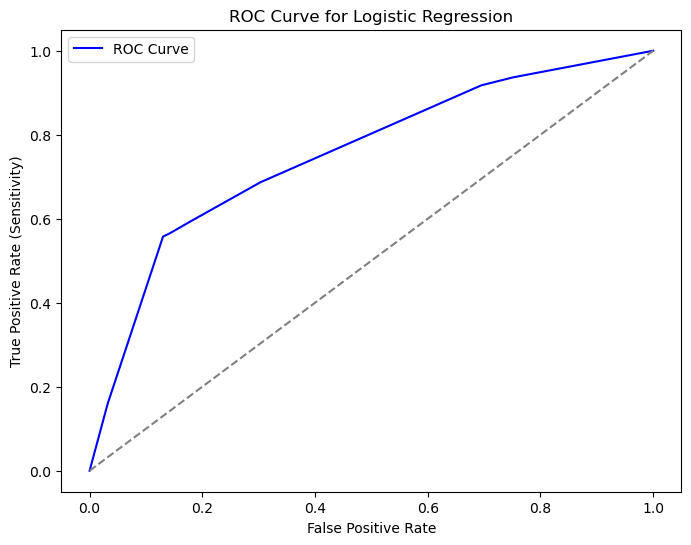

AUC Score: 0.7526000067906631


In [34]:
# plotting ROC curve and printing AUC score
gen_roc_curve(model, x_test, y_test)

In [35]:
# balancing data by undersampling
undersampler = RandomUnderSampler(random_state=42, sampling_strategy='auto')
x_undersampled, y_undersampled = undersampler.fit_resample(X2, Y2)

# balancing data by oversampling 
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_oversampled, y_oversampled = oversampler.fit_resample(X2, Y2)

In [36]:
# splitting undersampled data into training and test sets
x_train_undersampled, x_test_undersampled, y_train_undersampled, y_test_undersampled = \
train_test_split(x_undersampled, y_undersampled, test_size=0.2, random_state=42)

# splitting oversampled data into training and test sets
x_train_oversampled, x_test_oversampled, y_train_oversampled, y_test_oversampled = \
train_test_split(x_oversampled, y_oversampled, test_size=0.2, random_state=42)

In [37]:
# training logistic regression models with balanced data
model.fit(x_train_undersampled, y_train_undersampled)
model.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression(max_iter=1000)

In [38]:
# evaluating model on training and test data (undersampled)
under_train_score = model.score(x_train_undersampled, y_train_undersampled)
under_test_score = model.score(x_test_undersampled, y_test_undersampled)

# printing evaluation results
print("Undersampled Train Accuracy:", under_train_score)
print("Undersampled Test Accuracy:", under_test_score)

Undersampled Train Accuracy: 0.7106640600365769
Undersampled Test Accuracy: 0.700126103404792


In [39]:
# performing 10-fold cross-validation on undersampled data
under_cv_scores = cross_val_score(cv, x_undersampled, y_undersampled, cv=10, scoring='accuracy')

# printing results
print("Cross-validation scores for each fold:", under_cv_scores)
print("Mean Cross-validation Score:", under_cv_scores.mean())
print("Standard Deviation of Scores:", under_cv_scores.std())

Cross-validation scores for each fold: [0.77559254 0.66464952 0.65035318 0.67305752 0.77043391 0.82139253
 0.81382442 0.77447023 0.60191726 0.53985873]
Mean Cross-validation Score: 0.7085549827418018
Standard Deviation of Scores: 0.09104233220416387


In [40]:
# calculating precision, recall, and f1-score (undersampled)
y_pred_undersampled = model.predict(x_test_undersampled)

precision_under = precision_score(y_test_undersampled, y_pred_undersampled)
recall_under = recall_score(y_test_undersampled, y_pred_undersampled)
f1_under = f1_score(y_test_undersampled, y_pred_undersampled)

# printing results
print('Precision: ', precision_under)
print('Recall: ', recall_under)
print('F1-Score: ', f1_under)

Precision:  0.7550620509470934
Recall:  0.5868020304568528
F1-Score:  0.6603827477863468


In [42]:
# printing confusion matrix with threshold 0.5 (undersampled)
print(classify_for_threshold(model, x_test_undersampled, y_test_undersampled, 0.5))

Predicted   0   1
Actual           
0.0        26  22
1.0        26  14


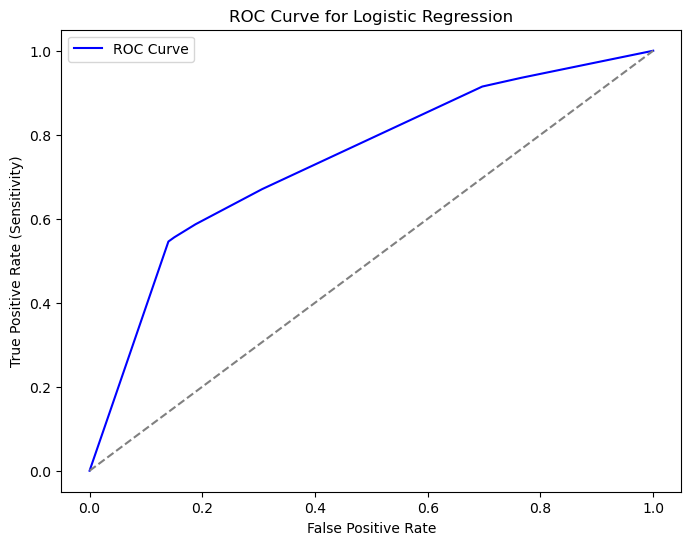

AUC Score: 0.7398241797386869


In [44]:
# plotting ROC curve and printing AUC score (undersampled)
gen_roc_curve(model, x_test_undersampled, y_test_undersampled)

In [45]:
# evaluating model on training and test data (oversampled)
over_train_score = model.score(x_train_oversampled, y_train_oversampled)
over_test_score = model.score(x_test_oversampled, y_test_oversampled)

# printing evaluation results
print("Oversampled Train Accuracy:", over_train_score)
print("Oversampled Test Accuracy:", over_test_score)

Oversampled Train Accuracy: 0.7080312648888087
Oversampled Test Accuracy: 0.7081895441668813


In [46]:
# performing 10-fold cross-validation on oversampled data
over_cv_scores = cross_val_score(cv, x_oversampled, y_oversampled, cv=10, scoring='accuracy')

# printing results
print("Cross-validation scores for each fold:", over_cv_scores)
print("Mean Cross-validation Score:", over_cv_scores.mean())
print("Standard Deviation of Scores:", over_cv_scores.std())

Cross-validation scores for each fold: [0.61210404 0.56142158 0.62673191 0.76595416 0.7694051  0.73731651
 0.76641772 0.6831316  0.77114453 0.78700937]
Mean Cross-validation Score: 0.7080636526083418
Standard Deviation of Scores: 0.07715908157817945


In [47]:
# calculating precision, recall, and f1-score (oversampled)
y_pred_oversampled = model.predict(x_test_oversampled)

precision_over = precision_score(y_test_oversampled, y_pred_oversampled)
recall_over = recall_score(y_test_oversampled, y_pred_oversampled)
f1_over = f1_score(y_test_oversampled, y_pred_oversampled)

# printing results
print('Precision: ', precision_over)
print('Recall: ', recall_over)
print('F1-Score: ', f1_over)

Precision:  0.7704621567314133
Recall:  0.5927242747462256
F1-Score:  0.6700061158517051


In [48]:
# printing confusion matrix with threshold 0.5 (oversampled)
print(classify_for_threshold(model, x_test_oversampled, y_test_oversampled, 0.5))

Predicted     0     1
Actual               
0.0        4678  2874
1.0         133    79


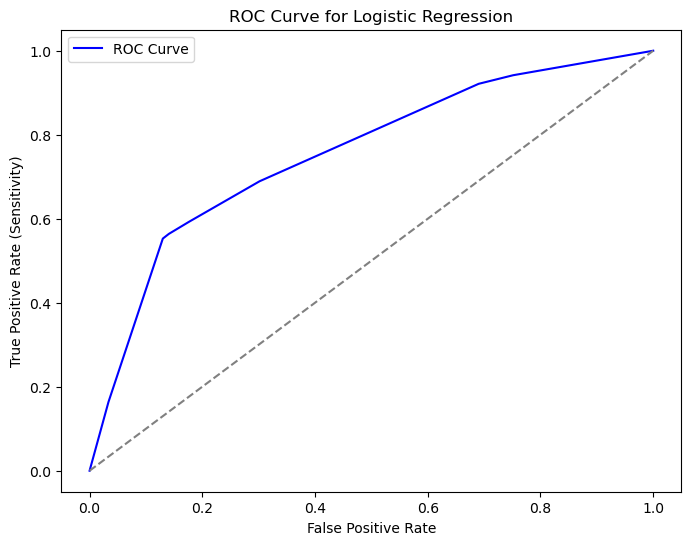

AUC Score: 0.755416252044037


In [50]:
# plotting ROC curve and printing AUC score (oversampled)
gen_roc_curve(model, x_test_oversampled, y_test_oversampled)